# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename, header=0)
print(df.shape)
df.head()


(28022, 50)


,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I chose the Airbnb data set.
2. I will be predicting the price, which will be the label.
3. This is a supervised learning problem since the examples have labels. It is a regression problem because the price of an Airbnb is a continuous value.
4. The features are the rest of the columns in the data set except for the price column.
5. Predicting the price of an Airbnb will allow the company Airbnb to help hosts make more informed pricing decisions and implement improved marketing strategies dependant on pricing trends. This can also be used to help users determine if the pricing is fair or not.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
# looking at summary statistics
print(df.describe())

# looking at data types of each column
print(df.dtypes)

# checking for missing values 
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)

# looking at correlations between features and price label 
corr_matrix = df.corr()['price']
print(corr_matrix)
corr_sorted = corr_matrix.sort_values(ascending=False)
print(corr_sorted)
corr_sorted = corr_sorted.drop('price')

# top 3 features correlated with price
top_3 = list(corr_sorted[:3].index)
print(top_3)

       host_response_rate  host_acceptance_rate  host_listings_count  \
count        16179.000000          16909.000000         28022.000000   
mean             0.906901              0.791953            14.554778   
std              0.227282              0.276732           120.721287   
min              0.000000              0.000000             0.000000   
25%              0.940000              0.680000             1.000000   
50%              1.000000              0.910000             1.000000   
75%              1.000000              1.000000             3.000000   
max              1.000000              1.000000          3387.000000   

       host_total_listings_count  accommodates     bathrooms      bedrooms  \
count               28022.000000  28022.000000  28022.000000  25104.000000   
mean                   14.554778      2.874491      1.142174      1.329708   
std                   120.721287      1.860251      0.421132      0.700726   
min                     0.000000      1

<AxesSubplot: xlabel='price', ylabel='accommodates'>

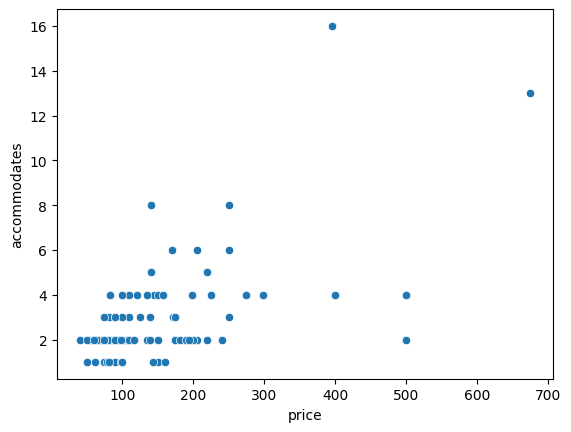

In [6]:
# graph for correlation between price and accomodates
df_corr1 = pd.DataFrame({'price': df['price'], 'accommodates': df['accommodates']})
sns.scatterplot(data=df_corr1.head(100), x='price', y='accommodates')

<AxesSubplot: xlabel='price', ylabel='bedrooms'>

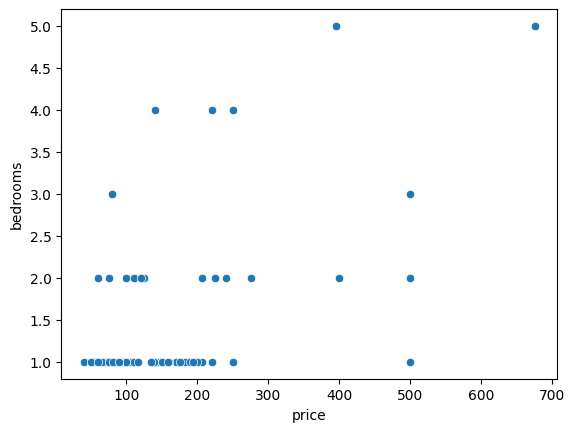

In [7]:
# graph for correlation between price and bedrooms
df_corr2 = pd.DataFrame({'price': df['price'], 'bedrooms': df['bedrooms']})
sns.scatterplot(data=df_corr2.head(100), x='price', y='bedrooms')

<AxesSubplot: xlabel='price', ylabel='beds'>

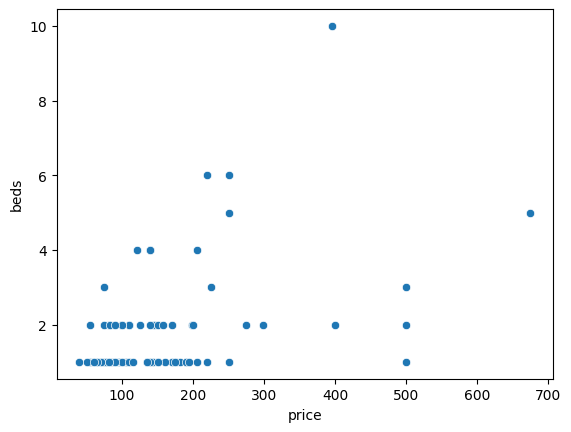

In [8]:
# graph for correlation between price and beds
df_corr3 = pd.DataFrame({'price': df['price'], 'beds': df['beds']})
sns.scatterplot(data=df_corr3.head(100), x='price', y='beds')

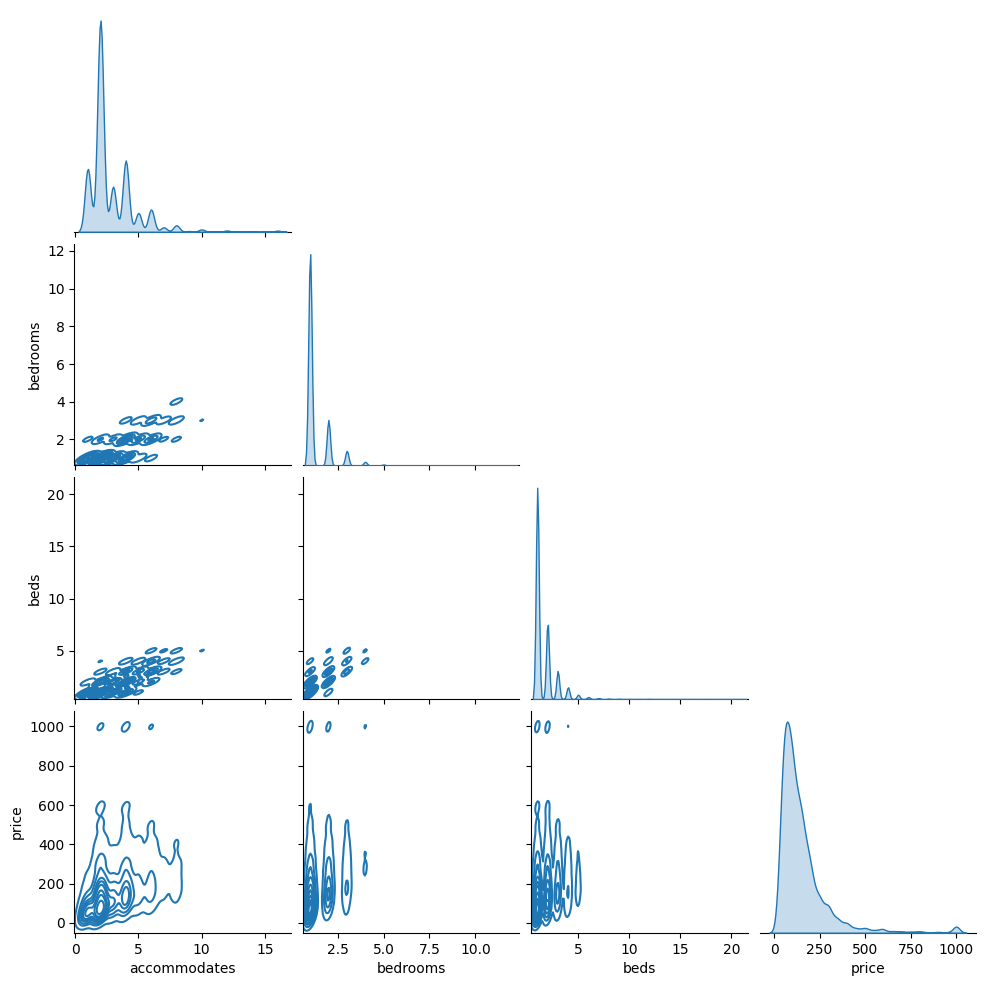

In [10]:
# pairplot for top 3 features and price label 
cols = top_3 + ['price']
df_pairplot = df[cols]
sns.pairplot(data=df_pairplot, kind='kde', corner=True)

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

I will use a new feature list that does not contain the features that are too difficult to one hot encode. 

For data preparation, I will one hot encode the features that are non-numerical and have only a few possible values and drop the feature columns that have too many possible values to one hot encode. I will replace the missing values with mean values. I will convert the boolean features to be numerical. I will also remove features that have no correlation with the label. I will scale all numerical features.

For modeling, I plan to use a random forest and GBDT model and then use model selection to select the best performing model. I will use grid search on each model to finetune the hyperparameters. For evaluation, I will calculate R^2 and RMSE scores for each model and compare these scores to determine the best performing model. 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

## Data Preparation

In [4]:
print('Columns:', list(df.columns))
print('Shape:', df.shape)

# determining which feature columns need to be encoded
to_encode = list(df.select_dtypes(include=['object']).columns)
print('Columns with type obj:', to_encode)
print(df[to_encode].nunique())
print(len(to_encode))

# determining numerical columns that will need to be scaled
num_cols = df.select_dtypes(include=['number']).columns
print(num_cols)
print(len(num_cols))


Columns: ['name', 'description', 'neighborhood_overview', 'host_name', 'host_location', 'host_about', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_h

In [5]:
# dropping columns that have no predictive power or would be too difficult to one-hot encode
drop_cols = to_encode
drop_cols.remove('neighbourhood_group_cleansed')
drop_cols.remove('room_type')
print('num of columns to be removed:', len(drop_cols))
print(drop_cols)
df = df.drop(drop_cols, axis = 1)
print(df.columns)
print(df.shape)

num of columns to be removed: 7
['name', 'description', 'neighborhood_overview', 'host_name', 'host_location', 'host_about', 'amenities']
Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_group_cleansed', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
   

In [6]:
# finding columns with missing values
nan_count = np.sum(df.isnull(), axis = 0)
print(nan_count)
nan_detected = nan_count!=0
is_int_or_float = (df.dtypes == 'int64') | (df.dtypes == 'float64')
print('columns missing values:', list(df.columns[nan_detected]))

# replacing missing values with mean
to_impute = nan_detected & is_int_or_float
to_impute_selected = df.columns[to_impute]
print('columns w/ missing values that can be replaced with mean:', list(to_impute_selected))
for colname in to_impute_selected: 
    df[colname].fillna(np.mean(df[colname]), inplace=True)
for colname in to_impute_selected:
    print("{} missing values count :{}".format(colname, np.sum(df[colname].isnull(), axis = 0)))


host_response_rate                              11843
host_acceptance_rate                            11113
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_group_cleansed                        0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                         2918
beds                                             1354
price                                               0
minimum_nights                                      0
maximum_nights                                      0
minimum_minimum_nights                              0
maximum_minimum_nights                              0
minimum_maximum_nights      

In [7]:
# scaling the numerical features
standard_scaler = StandardScaler()
scaled_vals = pd.DataFrame(standard_scaler.fit_transform(df[num_cols]), columns = df[num_cols].columns)
print("Z-Score Standardized DataFrame:")
print(scaled_vals)
df[num_cols] = scaled_vals
df.head()

Z-Score Standardized DataFrame:
       host_response_rate  host_acceptance_rate  host_listings_count  \
0           -6.190192e-01             -2.893351            -0.054298   
1           -4.730337e+00             -0.474289            -0.112284   
2            5.390984e-01             -2.521188            -0.112284   
3            5.390984e-01              0.967845            -0.112284   
4            6.428845e-16              0.000000            -0.112284   
...                   ...                   ...                  ...   
28017        5.390984e-01              0.967845            -0.054298   
28018        1.794549e-02              0.456120            -0.120567   
28019        4.811926e-01              0.921324            -0.070865   
28020       -3.996039e-02              0.967845            -0.095716   
28021        6.428845e-16              0.000000            -0.120567   

       host_total_listings_count  accommodates  bathrooms  bedrooms      beds  \
0                     

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,room_type,accommodates,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,-6.190192e-01,-2.893351,True,-0.054298,-0.054298,True,True,Manhattan,Entire home/apt,-1.007673,...,-0.038834,0.263662,-0.458809,False,-0.204236,-0.098120,-0.217119,-0.109127,-0.321256,1.888373
1,-4.730337e+00,-0.474289,True,-0.112284,-0.112284,True,True,Brooklyn,Entire home/apt,0.067470,...,-0.017309,-0.097167,-0.014806,False,-0.266296,-0.174687,-0.217119,-0.109127,0.697623,0.409419
2,5.390984e-01,-2.521188,True,-0.112284,-0.112284,True,True,Brooklyn,Entire home/apt,0.605041,...,0.413191,-0.602328,0.680156,False,-0.266296,-0.174687,-0.217119,-0.109127,-0.390981,-1.069535
3,5.390984e-01,0.967845,True,-0.112284,-0.112284,True,True,Manhattan,Private room,-0.470102,...,-0.835257,0.287717,-0.555332,False,-0.266296,-0.212970,-0.161477,-0.109127,0.432219,-0.576550
4,6.428845e-16,0.000000,True,-0.112284,-0.112284,True,True,Manhattan,Private room,-1.007673,...,0.305566,0.456104,0.525720,False,-0.266296,-0.212970,-0.161477,-0.109127,-0.199800,0.902404


In [8]:
# only these 2 features will be easy to one hot encode because there are few unique values
to_one_hot = ['neighbourhood_group_cleansed', 'room_type']
print('room types:', df['room_type'].unique())
print('neighborhood groups:', df['neighbourhood_group_cleansed'].unique())

# one hot encoding for room_type 
df_room_type = pd.get_dummies(df['room_type'], prefix='room_type')
df = df.join(df_room_type)
df.drop(columns = 'room_type', inplace=True)

# one hot encoding for neighbourhood_group_cleansed
df_neighborhood = pd.get_dummies(df['neighbourhood_group_cleansed'], prefix='neighbourhood_group')
df = df.join(df_neighborhood)
df.drop(columns = 'neighbourhood_group_cleansed', inplace=True)

print(df.shape)
df.head()

room types: ['Entire home/apt' 'Private room' 'Hotel room' 'Shared room']
neighborhood groups: ['Manhattan' 'Brooklyn' 'Queens' 'Staten Island' 'Bronx']
(28022, 50)


,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,...,n_host_verifications,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,-6.190192e-01,-2.893351,True,-0.054298,-0.054298,True,True,-1.007673,-0.337606,0.000000,...,1.888373,1,0,0,0,0,0,1,0,0
1,-4.730337e+00,-0.474289,True,-0.112284,-0.112284,True,True,0.067470,-0.337606,-0.497128,...,0.409419,1,0,0,0,0,1,0,0,0
2,5.390984e-01,-2.521188,True,-0.112284,-0.112284,True,True,0.605041,0.849692,1.010653,...,-1.069535,1,0,0,0,0,1,0,0,0
3,5.390984e-01,0.967845,True,-0.112284,-0.112284,True,True,-0.470102,-0.337606,-0.497128,...,-0.576550,0,0,1,0,0,0,1,0,0
4,6.428845e-16,0.000000,True,-0.112284,-0.112284,True,True,-1.007673,-0.337606,-0.497128,...,0.902404,0,0,1,0,0,0,1,0,0


In [9]:
# changing boolean values to numerical  
bool_cols = list(df.select_dtypes(include=['bool']).columns)
print(bool_cols)
for col in bool_cols:
     df[col] = df[col].astype(int)

df[bool_cols]

['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable']


,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable
0,1,1,1,1,0
1,1,1,1,1,0
2,1,1,1,1,0
3,1,1,1,1,0
4,1,1,1,1,0
...,...,...,...,...,...
28017,1,1,1,1,1
28018,1,1,1,1,0
28019,1,1,1,1,1
28020,1,1,1,1,0


In [10]:
# checking feature correlations with the price label
corr_matrix = df.corr()['price']
print(corr_matrix)

# removing features with no correlation because there is only one feature value so no predictive power
no_corr = corr_matrix.isnull()
to_be_removed = corr_matrix[no_corr].index
print(to_be_removed)
df = df.drop(to_be_removed, axis=1)
print(df.shape)

# finding features most correlated with price
corr_sorted = corr_matrix.sort_values(ascending=False)
corr_sorted = corr_sorted.drop('price') # removing price from correlation list
corr_sorted

host_response_rate                              0.005422
host_acceptance_rate                            0.031266
host_is_superhost                                    NaN
host_listings_count                             0.080995
host_total_listings_count                       0.080995
host_has_profile_pic                                 NaN
host_identity_verified                               NaN
accommodates                                    0.519057
bathrooms                                       0.331297
bedrooms                                        0.457171
beds                                            0.400325
price                                           1.000000
minimum_nights                                 -0.079945
maximum_nights                                 -0.001024
minimum_minimum_nights                         -0.071261
maximum_minimum_nights                         -0.007691
minimum_maximum_nights                          0.064011
maximum_maximum_nights         

accommodates                                    0.519057
bedrooms                                        0.457171
beds                                            0.400325
room_type_Entire home/apt                       0.346902
bathrooms                                       0.331297
neighbourhood_group_Manhattan                   0.237643
availability_60                                 0.152750
availability_90                                 0.148228
availability_30                                 0.146895
room_type_Hotel room                            0.127915
availability_365                                0.123984
maximum_maximum_nights                          0.107901
review_scores_location                          0.096610
maximum_nights_avg_ntm                          0.081589
review_scores_cleanliness                       0.081402
host_total_listings_count                       0.080995
host_listings_count                             0.080995
minimum_maximum_nights         

In [11]:
# checking status of dataset after using all data preparation techniques
print(df.dtypes)
df.head()

host_response_rate                              float64
host_acceptance_rate                            float64
host_listings_count                             float64
host_total_listings_count                       float64
accommodates                                    float64
bathrooms                                       float64
bedrooms                                        float64
beds                                            float64
price                                           float64
minimum_nights                                  float64
maximum_nights                                  float64
minimum_minimum_nights                          float64
maximum_minimum_nights                          float64
minimum_maximum_nights                          float64
maximum_maximum_nights                          float64
minimum_nights_avg_ntm                          float64
maximum_nights_avg_ntm                          float64
has_availability                                

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,n_host_verifications,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island
0,-6.190192e-01,-2.893351,-0.054298,-0.054298,-1.007673,-0.337606,0.000000,-0.588233,-0.030031,0.442362,...,1.888373,1,0,0,0,0,0,1,0,0
1,-4.730337e+00,-0.474289,-0.112284,-0.112284,0.067470,-0.337606,-0.497128,1.280490,-0.562648,-0.691838,...,0.409419,1,0,0,0,0,1,0,0,0
2,5.390984e-01,-2.521188,-0.112284,-0.112284,0.605041,0.849692,1.010653,0.346128,0.857665,-0.535396,...,-1.069535,1,0,0,0,0,1,0,0,0
3,5.390984e-01,0.967845,-0.112284,-0.112284,-0.470102,-0.337606,-0.497128,-0.588233,-0.612359,-0.652727,...,-0.576550,0,0,1,0,0,0,1,0,0
4,6.428845e-16,0.000000,-0.112284,-0.112284,-1.007673,-0.337606,-0.497128,-0.588233,-0.562648,-0.652727,...,0.902404,0,0,1,0,0,0,1,0,0


## Model Training

In [12]:
y = df['price']
X = df.drop(columns = 'price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [13]:
# GBDT model
gbdt_model = GradientBoostingRegressor(max_depth = 2, n_estimators = 300)
gbdt_model.fit(X_train, y_train)

y_GBDT_pred = gbdt_model.predict(X_test) 

gbdt_rmse = mean_squared_error(y_test, y_GBDT_pred, squared=False) 
gbdt_r2 = r2_score(y_test, y_GBDT_pred)

print('[GBDT] Root Mean Squared Error: {0}'.format(gbdt_rmse)) 
print('[GBDT] R2: {0}'.format(gbdt_r2))

[GBDT] Root Mean Squared Error: 0.6454147314649293
[GBDT] R2: 0.5866525934687356


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [14]:
# GBDT model using grid search
param_grid = {
    'n_estimators': [100, 200, 250],
    'max_depth': [5, 10, 20],
}

gbdt = GradientBoostingRegressor()

# using grid search to find best hyperparameters for GBDT
grid_search = GridSearchCV(estimator=gbdt, param_grid=param_grid, 
                           cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_gbdt = grid_search.best_estimator_


y_pred = best_gbdt.predict(X_test)

gbdt_rmse_grid = mean_squared_error(y_test, y_pred, squared=False)
gbdt_r2_grid = r2_score(y_test, y_pred)

print('[GBDT] Root Mean Squared Error: {0}'.format(gbdt_rmse_grid)) 
print('[GBDT] R2: {0}'.format(gbdt_r2_grid))

Best Parameters: {'max_depth': 5, 'n_estimators': 250}
[RF] Root Mean Squared Error: 0.5826331473962388
[RF] R2: 0.6631567511743126


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [15]:
# random forest model
rf_model = RandomForestRegressor(max_depth = 32, n_estimators = 300)
rf_model.fit(X_train, y_train)

y_rf_pred = rf_model.predict(X_test)

rf_rmse = mean_squared_error(y_test, y_rf_pred, squared=False)
rf_r2 = r2_score(y_test, y_rf_pred)

print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse)) 
print('[RF] R2: {0}'.format(rf_r2))

[RF] Root Mean Squared Error: 0.6064529786928664
[RF] R2: 0.6350513711114578


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [16]:
# random forest model using grid search
param_grid = {
    'n_estimators': [100, 200, 250],
    'max_depth': [5, 10, 20]
}

rf = RandomForestRegressor()

# using grid search to find best hyperparameters for random forest
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_


y_pred = best_rf.predict(X_test)

rf_rmse_grid = mean_squared_error(y_test, y_pred, squared=False)
rf_r2_grid = r2_score(y_test, y_pred)

print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse_grid)) 
print('[RF] R2: {0}'.format(rf_r2_grid))

Best Parameters: {'max_depth': 20, 'n_estimators': 200}
[RF] Root Mean Squared Error: 0.6026010381830404
[RF] R2: 0.6396726560261073


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


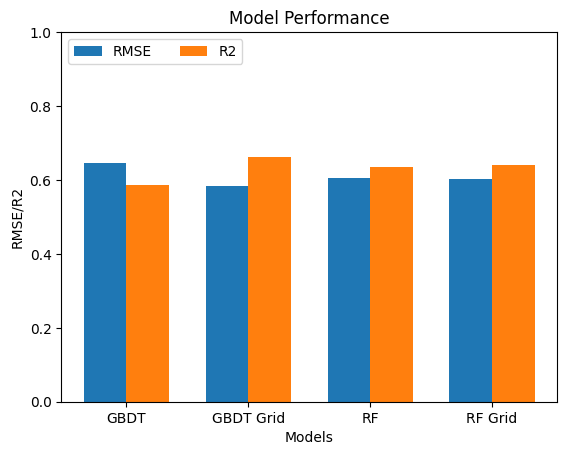

In [19]:
# graphing the results of each model 

RMSE_Results = [gbdt_rmse, gbdt_rmse_grid, rf_rmse, rf_rmse_grid]
R2_Results = [gbdt_r2, gbdt_r2_grid, rf_r2, rf_r2_grid]

rg= np.arange(4)
width = 0.35

plt.bar(rg, RMSE_Results, width, label="RMSE")

plt.bar(rg+width, R2_Results, width, label='R2')
labels = ['GBDT', 'GBDT Grid', 'RF', 'RF Grid']
plt.xticks(rg + width/2, labels)
plt.xlabel("Models")
plt.ylabel("RMSE/R2")
plt.ylim([0,1])
plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

Since a lower RMSE score and a higher R^2 score indicate a better performing model, it looks like the GBDT model using grid search was the best performing model because it had the lowest RMSE score and highest R^2 score. The best hyperparameters were 'max_depth'=5 and 'n_estimators'=250. The RMSE score was 0.582, and the R^2 score was 0.663.